In [3]:
import pandas as pd
import numpy as np
import import_ipynb

In [4]:
train_neg = pd.read_csv('data/train.negative.csv', quotechar=None, quoting=3, sep='\t', header=None)
train_non = pd.read_csv('data/train.non-negative.csv', quotechar=None, quoting=3, sep='\t', header=None)

test_neg = pd.read_csv('data/test.negative.csv', quotechar=None, quoting=3, sep='\t', header=None)
test_non = pd.read_csv('data/test.non-negative.csv', quotechar=None, quoting=3, sep='\t', header=None)

In [5]:
train_neg.head()

,0
0,"""@USAirways did I mention I'm a silver preferr..."
1,That will be the third time I have been called...
2,it's taken care of already. I've come to expec...
3,flight 1219. My frustration boiled over after ...
4,Worst customer service ever. You Cancelled Fli...


In [7]:
import common_my_NLP

importing Jupyter notebook from common_my_NLP.ipynb


In [8]:
# train_neg[0] = train_neg[0].apply(lambda x: my_NLP.remove_html(x))
# train_non[0] = train_non[0].apply(lambda x: my_NLP.remove_html(x))

# test_neg[0] = test_neg[0].apply(lambda x: my_NLP.remove_html(x))
# test_non[0] = test_non[0].apply(lambda x: my_NLP.remove_html(x))

In [11]:
train_neg[0] = train_neg[0].apply(lambda x: common_my_NLP.remove_punctuation(x))
train_non[0] = train_non[0].apply(lambda x: common_my_NLP.remove_punctuation(x))

test_neg[0] = test_neg[0].apply(lambda x: common_my_NLP.remove_punctuation(x))
test_non[0] = test_non[0].apply(lambda x: common_my_NLP.remove_punctuation(x))

In [12]:
train_neg[0] = train_neg[0].apply(lambda x: x.lower())
train_non[0] = train_non[0].apply(lambda x: x.lower())

test_neg[0] = test_neg[0].apply(lambda x: x.lower())
test_non[0] = test_non[0].apply(lambda x: x.lower())

In [13]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [14]:
tok_lem_sentence_train_neg = [[token.lemma_ for token in nlp(row[0].strip())] for index, row in train_neg.iterrows()]
tok_lem_sentence_train_non = [[token.lemma_ for token in nlp(row[0].strip())] for index, row in train_non.iterrows()]

tok_lem_sentence_test_neg = [[token.lemma_ for token in nlp(row[0].strip())] for index, row in test_neg.iterrows()]
tok_lem_sentence_test_non = [[token.lemma_ for token in nlp(row[0].strip())] for index, row in test_non.iterrows()]

In [15]:
tok_lem_sentence_train_neg[0]

['usairway',
 'do',
 'I',
 'mention',
 'I',
 'm',
 'a',
 'silver',
 'preferred',
 'member',
 'and',
 'fly',
 'every',
 'week',
 'not',
 'always',
 'with',
 'you',
 'and',
 'not',
 'even',
 'a',
 'meal',
 'voucher']

In [16]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))  

In [17]:
rmv_sw_sentence_train_neg = [ [word for word in sentence if not word in stop_words and word != ' '] for sentence in tok_lem_sentence_train_neg]
rmv_sw_sentence_train_non = [ [word for word in sentence if not word in stop_words and word != ' '] for sentence in tok_lem_sentence_train_non]

rmv_sw_sentence_test_neg = [ [word for word in sentence if not word in stop_words and word != ' '] for sentence in tok_lem_sentence_test_neg]
rmv_sw_sentence_test_non = [ [word for word in sentence if not word in stop_words and word != ' '] for sentence in tok_lem_sentence_test_non]

In [18]:
rmv_sw_sentence_test_neg[0]

['flight', '2646', 'four', 'hour', 'plane', 'ground', 'bwi']

In [22]:
def make_frequency_dict(dictionary, neg_sentences, non_sentences):
    # idx = 0

    for sentence in neg_sentences:
        for word in sentence:
            
            if word not in dictionary:
                dictionary[word] = 0
                # idx += 1
            
            dictionary[word] += 1
    
    for sentence in non_sentences:
        for word in sentence:
            
            if word not in dictionary:
                dictionary[word] = 0
                # idx += 1
            
            dictionary[word] += 1

In [23]:
def make_idx_dict(dictionary, neg_sentences, non_sentences):
    idx = 0

    for sentence in neg_sentences:
        for word in sentence:
            
            if word not in dictionary:
                dictionary[word] = idx
                idx += 1
            
            # dictionary[word] += 1
    
    for sentence in non_sentences:
        for word in sentence:
            
            if word not in dictionary:
                dictionary[word] = idx
                idx += 1
            
            # dictionary[word] += 1

In [24]:
dictionary = {}
make_frequency_dict(dictionary, rmv_sw_sentence_train_neg, rmv_sw_sentence_train_non)
# make_idx_dict(dictionary, rmv_sw_sentence_train_neg, rmv_sw_sentence_train_non)

In [25]:
dictionary

{'usairway': 2563,
 'I': 8330,
 'mention': 26,
 'silver': 14,
 'preferred': 9,
 'member': 89,
 'fly': 748,
 'every': 113,
 'week': 191,
 'always': 107,
 'even': 287,
 'meal': 33,
 'voucher': 128,
 'third': 16,
 'time': 939,
 'call': 762,
 '8004337300': 5,
 'hung': 1,
 'anyone': 111,
 'speak': 155,
 'take': 504,
 'care': 160,
 'already': 178,
 'come': 222,
 'expect': 83,
 'level': 18,
 'horrible': 82,
 'service': 978,
 'flight': 4626,
 '1219': 1,
 'frustration': 16,
 'boil': 1,
 'deal': 100,
 'attendant': 142,
 'attitude': 30,
 'ridiculous': 84,
 'bad': 456,
 'customer': 919,
 'ever': 242,
 'cancel': 1039,
 'flightle': 459,
 'connect': 126,
 'ny': 24,
 'hour': 1119,
 'ago': 128,
 'amp': 629,
 'tell': 481,
 'stick': 173,
 'tampa': 15,
 'hey': 69,
 'bag': 752,
 'damage': 22,
 'yesterday': 106,
 'site': 96,
 'work': 402,
 'wtf': 40,
 'get': 1922,
 'assistance': 53,
 'today': 418,
 'phx': 54,
 'dfw': 144,
 'hate': 47,
 'job': 87,
 'concern': 32,
 'hold': 701,
 'counting': 16,
 '…': 43,
 'ne

In [26]:
# a = list(dictionary.keys())
# print(len(a))
# print(a[-5:])
# for word in a[-5:]:
#     print(dictionary[word])

In [27]:
# sorted_dict = sorted(dictionary.items(), key=lambda x:x[1], reverse = True)

In [28]:
def rmv_frequency_dict(dictionary, low_bound):
    rmv_list = []
    for key, value in dictionary.items():
        if value <= low_bound:
            rmv_list.append(key)
    
    for word in rmv_list:
        dictionary.pop(word)

In [29]:
rmv_frequency_dict(dictionary, 3)

In [31]:
dictionary

{'usairway': 2563,
 'I': 8330,
 'mention': 26,
 'silver': 14,
 'preferred': 9,
 'member': 89,
 'fly': 748,
 'every': 113,
 'week': 191,
 'always': 107,
 'even': 287,
 'meal': 33,
 'voucher': 128,
 'third': 16,
 'time': 939,
 'call': 762,
 '8004337300': 5,
 'anyone': 111,
 'speak': 155,
 'take': 504,
 'care': 160,
 'already': 178,
 'come': 222,
 'expect': 83,
 'level': 18,
 'horrible': 82,
 'service': 978,
 'flight': 4626,
 'frustration': 16,
 'deal': 100,
 'attendant': 142,
 'attitude': 30,
 'ridiculous': 84,
 'bad': 456,
 'customer': 919,
 'ever': 242,
 'cancel': 1039,
 'flightle': 459,
 'connect': 126,
 'ny': 24,
 'hour': 1119,
 'ago': 128,
 'amp': 629,
 'tell': 481,
 'stick': 173,
 'tampa': 15,
 'hey': 69,
 'bag': 752,
 'damage': 22,
 'yesterday': 106,
 'site': 96,
 'work': 402,
 'wtf': 40,
 'get': 1922,
 'assistance': 53,
 'today': 418,
 'phx': 54,
 'dfw': 144,
 'hate': 47,
 'job': 87,
 'concern': 32,
 'hold': 701,
 'counting': 16,
 '…': 43,
 'need': 676,
 'simple': 13,
 'name': 11

In [32]:
def idx_dictionary(dictionary):
    idx = 0

    for key, value in dictionary.items():
        dictionary[key] = idx
        idx += 1

In [33]:
idx_dictionary(dictionary)

In [34]:
train_neg_len = len(rmv_sw_sentence_train_neg)
train_non_len = (len(rmv_sw_sentence_train_non)*2)-124

test_neg_len = len(rmv_sw_sentence_test_neg)
test_non_len = len(rmv_sw_sentence_test_non)

train_row_len = (train_neg_len + train_non_len)
test_row_len = (test_neg_len + test_non_len)
col_len = len(dictionary)

train_x = np.zeros((train_row_len, col_len))
test_x = np.zeros((test_row_len, col_len))

In [35]:
train_x.shape

(20000, 2955)

In [36]:
idx = 0

for sentence in rmv_sw_sentence_train_neg:
    for word in sentence:
        if word in dictionary:
            place = dictionary[word]
            train_x[idx][place] = 1
    idx += 1

for sentence in rmv_sw_sentence_train_non:
    for word in sentence:
        if word in dictionary:
            place = dictionary[word]
            train_x[idx][place] = 1
    idx += 1

for sentence in rmv_sw_sentence_train_non[:-124]:
    for word in sentence:
        if word in dictionary:
            place = dictionary[word]
            train_x[idx][place] = 1
    idx += 1

In [37]:
idx = 0

for sentence in rmv_sw_sentence_test_neg:
    for word in sentence:
        if word in dictionary:
            place = dictionary[word]
            train_x[idx][place] = 1
    idx += 1

for sentence in rmv_sw_sentence_test_non:
    for word in sentence:
        if word in dictionary:
            place = dictionary[word]
            train_x[idx][place] = 1
    idx += 1

In [38]:
train_y_non_set = np.ones((train_neg_len, 1))
train_y_non_unset = np.zeros((train_neg_len, 1))
train_y_neg_unset = np.zeros((train_non_len, 1))
train_y_neg_set = np.ones((train_non_len, 1))

tmp_train_y_non = np.concatenate((train_y_non_set, train_y_non_unset), axis=1)
tmp_train_y_neg = np.concatenate((train_y_neg_unset, train_y_neg_set), axis=1)

test_y_non_set = np.ones((test_neg_len, 1))
test_y_non_unset = np.zeros((test_neg_len, 1))
test_y_neg_unset = np.zeros((test_non_len, 1))
test_y_neg_set = np.ones((test_non_len, 1))

tmp_test_y_non = np.concatenate((test_y_non_set, test_y_non_unset), axis=1)
tmp_test_y_neg = np.concatenate((test_y_neg_unset, test_y_neg_set), axis=1)

print(tmp_train_y_non.shape, tmp_train_y_neg.shape)
print(tmp_test_y_non.shape, tmp_test_y_neg.shape)

(9068, 2) (10932, 2)
(100, 2) (100, 2)


In [39]:
train_y = np.concatenate((tmp_train_y_non, tmp_train_y_neg), axis=0)
test_y = np.concatenate((tmp_test_y_non, tmp_test_y_neg), axis=0)

print(train_y.shape, test_y.shape)

(20000, 2) (200, 2)


In [40]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(20000, 2955) (20000, 2)
(200, 2955) (200, 2)


In [41]:
from two_layer_net import TwoLayerNet
import matplotlib.pyplot as plt

importing Jupyter notebook from two_layer_net.ipynb
importing Jupyter notebook from common_functions.ipynb
importing Jupyter notebook from common_gradient.ipynb


In [42]:
network = TwoLayerNet(input_size=len(dictionary), hidden_size=50, output_size=2)

In [43]:
iters_num = 10000
train_size = train_x.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)


In [50]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = train_x[batch_mask]
    t_batch = train_y[batch_mask]

    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(train_x, train_y)
        test_acc = network.accuracy(test_x, test_y)
        print(len(y))
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

20000
train acc, test acc | 0.9016, 0.5
20000
train acc, test acc | 0.90105, 0.5
20000
train acc, test acc | 0.89715, 0.5
20000
train acc, test acc | 0.90075, 0.5
20000
train acc, test acc | 0.90015, 0.5
20000
train acc, test acc | 0.9025, 0.5
20000
train acc, test acc | 0.9033, 0.5
20000
train acc, test acc | 0.9028, 0.5
20000
train acc, test acc | 0.9, 0.5
20000
train acc, test acc | 0.9032, 0.5
20000
train acc, test acc | 0.90305, 0.5
20000
train acc, test acc | 0.90455, 0.5
20000
train acc, test acc | 0.9039, 0.5
20000
train acc, test acc | 0.9018, 0.5
20000
train acc, test acc | 0.90295, 0.5
20000
train acc, test acc | 0.90515, 0.5
20000
train acc, test acc | 0.8972, 0.5
20000
train acc, test acc | 0.9031, 0.5
20000
train acc, test acc | 0.9027, 0.5
20000
train acc, test acc | 0.90245, 0.5
20000
train acc, test acc | 0.90255, 0.5
20000
train acc, test acc | 0.90285, 0.5
20000
train acc, test acc | 0.9034, 0.5
20000
train acc, test acc | 0.90585, 0.5
20000
train acc, test acc | 0.9

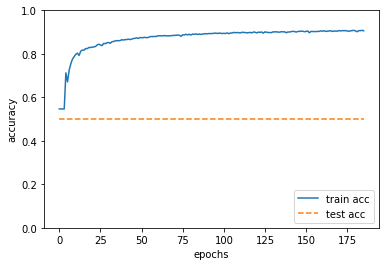

In [51]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()